<a href="https://colab.research.google.com/github/trizyx/ml_sem/blob/main/hse_ml_linear_model(sm2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pandas as pd
import numpy as np
%matplotlib inline
warnings.simplefilter("ignore")
sns.set(style="darkgrid")

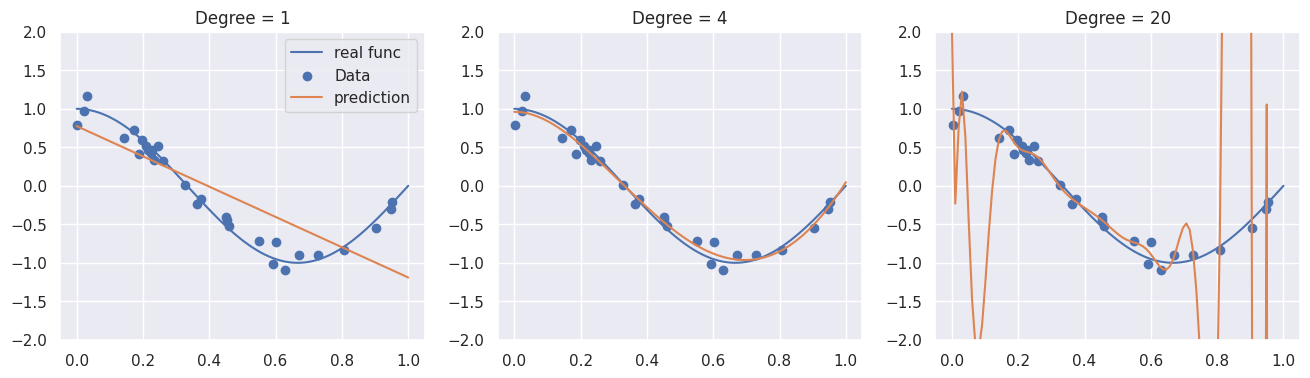

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

np.random.seed(36)
x = np.linspace(0, 1, 100)
y = np.cos(1.5 * np.pi * x)

x_objects = np.random.uniform(0, 1, size=30)
y_objects = np.cos(1.5 * np.pi * x_objects) + np.random.normal(scale=0.1, size=x_objects.shape)

fig, axs = plt.subplots(figsize=(16, 4), ncols=3)

for i, degree in enumerate([1, 4, 20]):
  X_objects = PolynomialFeatures(degree, include_bias=False).fit_transform(x_objects[:, None])
  X = PolynomialFeatures(degree, include_bias=False).fit_transform(x[:, None])
  regr = LinearRegression().fit(X_objects, y_objects)
  y_pred = regr.predict(X)
  axs[i].plot(x, y, label='real func')
  axs[i].scatter(x_objects, y_objects, label='Data')
  axs[i].plot(x, y_pred, label='prediction')
  if i == 0:
    axs[i].legend()
  axs[i].set_title(f'Degree = {degree}')
  axs[i].set_ylim(-2, 2)



In [3]:
#ПОЛУЧАЕМ ДАННЫЕ

In [4]:
!wget  -O 'train_sem2.csv' -q 'https://www.dropbox.com/s/6dxq90t0prn2vaw/_train_sem2.csv?dl=0'

In [5]:
data = pd.read_csv("train_sem2.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
data.shape

(1460, 81)

In [7]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
from sklearn.model_selection import train_test_split

data = data.drop(columns=['Id'])

y = data['SalePrice']
X = data.drop(columns=['SalePrice'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

<Axes: xlabel='SalePrice', ylabel='Density'>

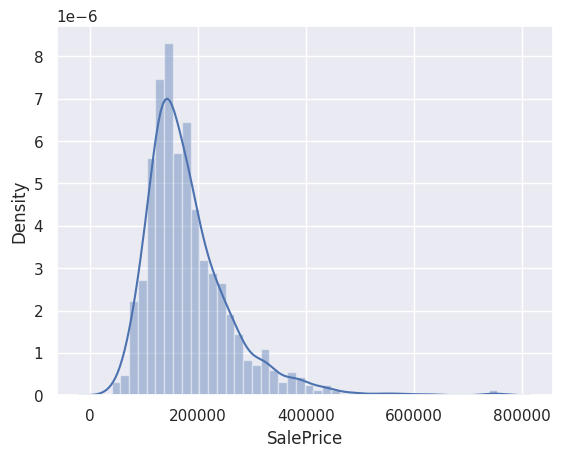

In [9]:
sns.distplot(y_train)

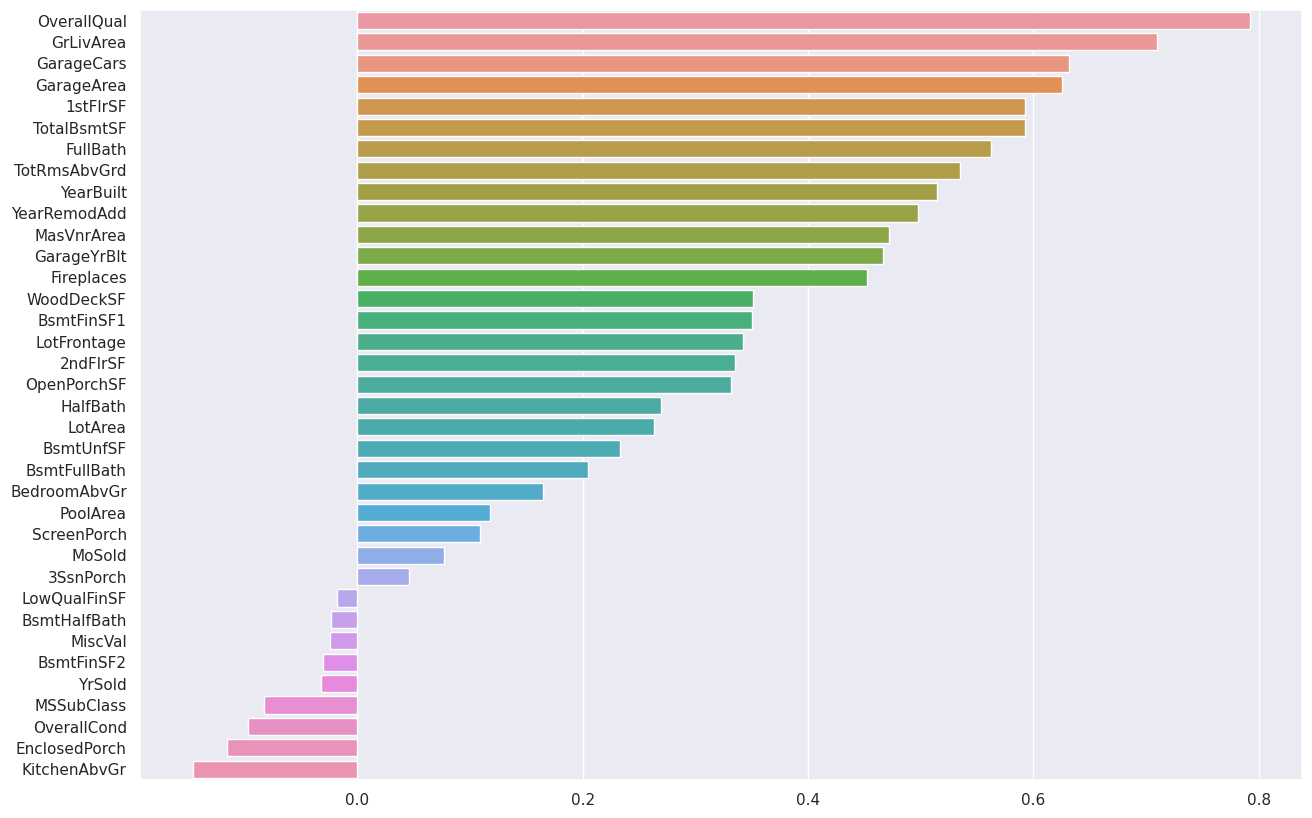

In [10]:
numeric_data = X_train.select_dtypes([np.number])
numeric_data_mean = numeric_data.mean()
numeric_features = numeric_data.columns

X_train = X_train.fillna(numeric_data_mean)
X_test = X_test.fillna(numeric_data_mean)

correlations = X_train[numeric_features].corrwith(y_train).sort_values(ascending=False)

plot = sns.barplot(x=correlations, y=correlations.index)
plot.figure.set_size_inches(15, 10)

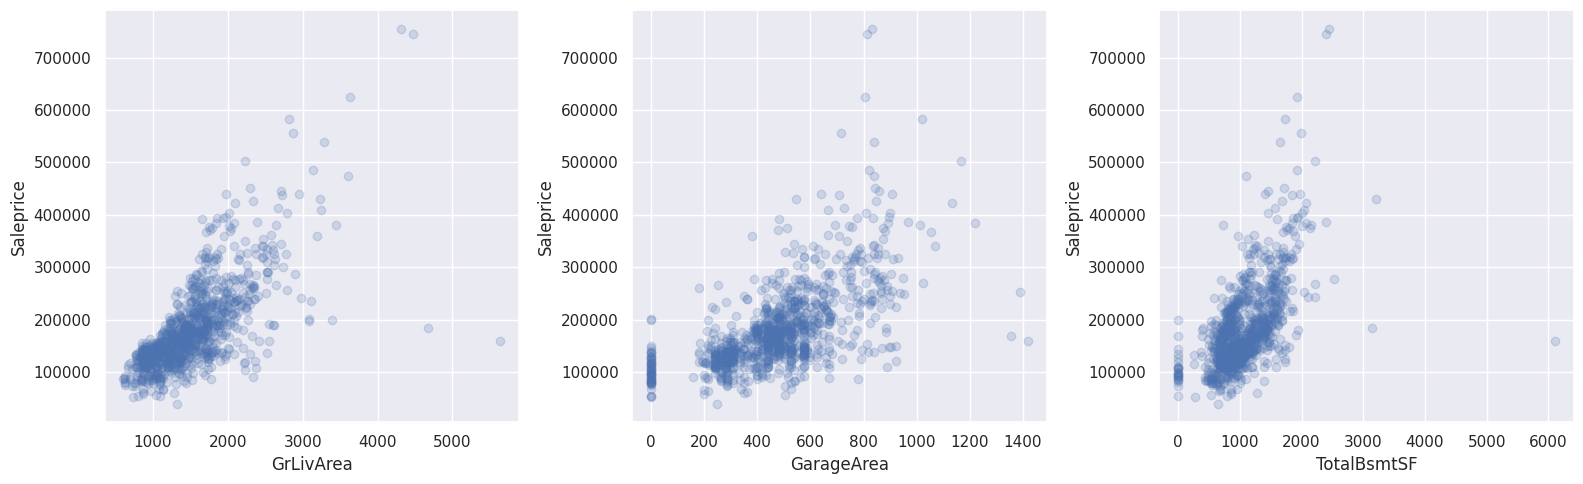

In [11]:
fig, axs = plt.subplots(figsize=(16, 5), ncols=3)
for i, feature in enumerate(['GrLivArea', 'GarageArea', 'TotalBsmtSF']):
  axs[i].scatter(X_train[feature], y_train, alpha=0.2)
  axs[i].set_xlabel(feature)
  axs[i].set_ylabel('Saleprice')
plt.tight_layout()

In [12]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

model = Ridge()
model.fit(X_train[numeric_features], y_train)
y_pred = model.predict(X_test[numeric_features])
y_train_pred = model.predict(X_train[numeric_features])

print('Test RMSE %.4f' % mean_squared_error(y_test, y_pred, squared=False))
print('Train RMSE %.4f' % mean_squared_error(y_train, y_train_pred, squared=False))

Test RMSE 32085.7681
Train RMSE 35631.3131


In [13]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_train[numeric_features], y_train, cv=10, scoring='neg_root_mean_squared_error')
print("Cross validation scores:\n\t", "\n\t".join("%.4f" % x for x in cv_scores))
print("Mean CV MSE = %.4f" % np.mean(-cv_scores))

Cross validation scores:
	 -38825.3172
	-45278.9230
	-31405.3380
	-33890.1048
	-73848.3061
	-24142.7915
	-45523.7066
	-52861.2908
	-26094.3376
	-29693.5005
Mean CV MSE = 40156.3616


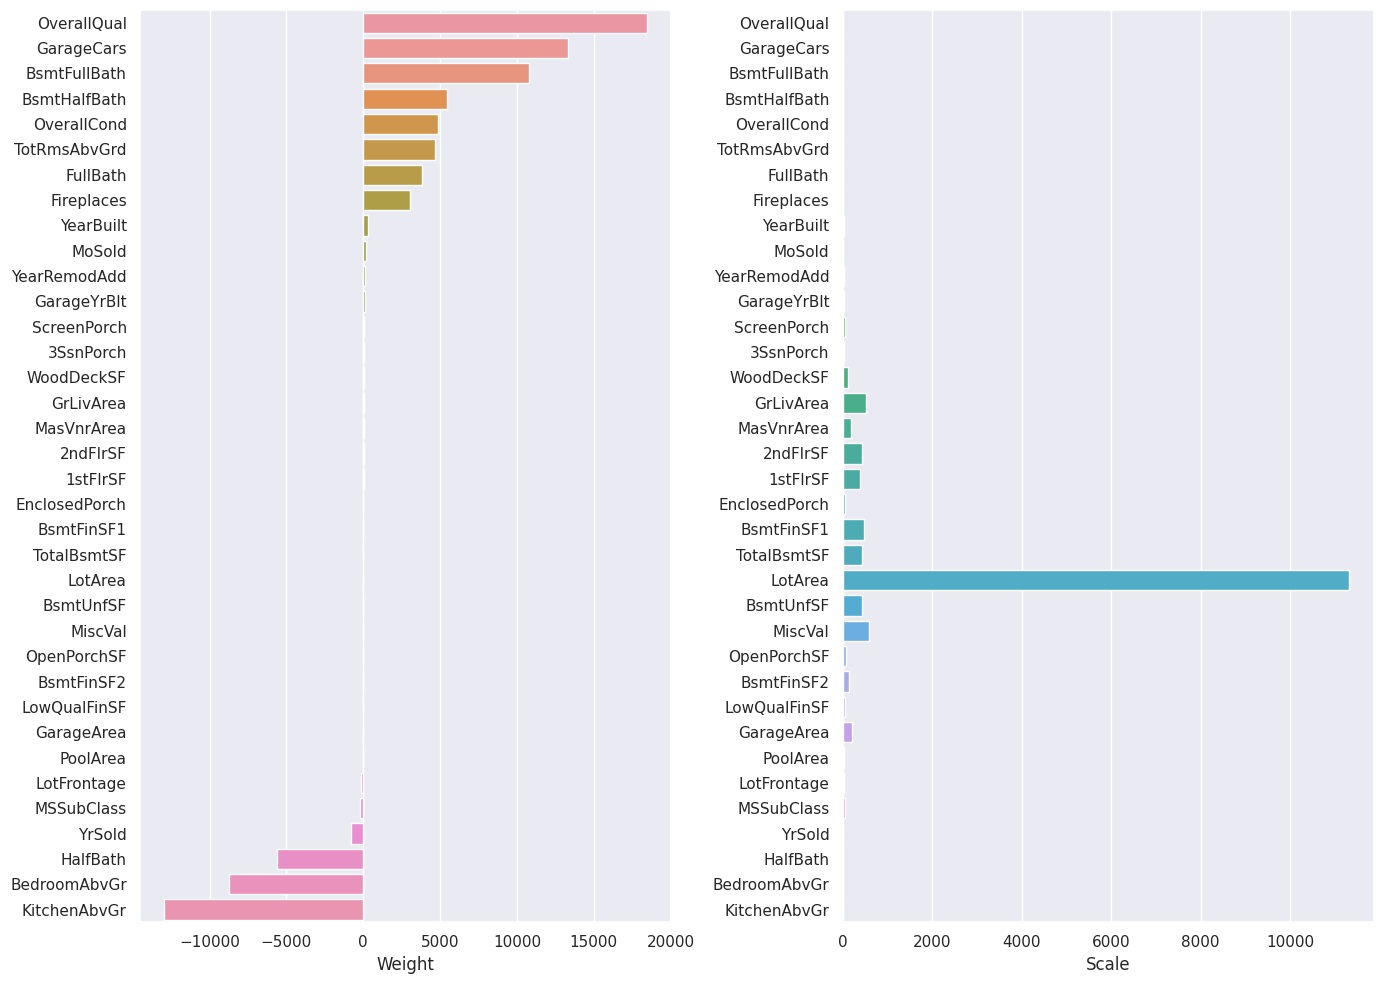

In [14]:
def show_weights(features, weights, scales):
    fig, axs = plt.subplots(figsize=(14, 10), ncols=2)
    sorted_weights = sorted(zip(weights, features, scales), reverse=True)
    weights = [x[0] for x in sorted_weights]
    features = [x[1] for x in sorted_weights]
    scales = [x[2] for x in sorted_weights]
    sns.barplot(y=features, x=weights, ax=axs[0])
    axs[0].set_xlabel("Weight")
    sns.barplot(y=features, x=scales, ax=axs[1])
    axs[1].set_xlabel("Scale")
    plt.tight_layout()
show_weights(numeric_features, model.coef_, X_train[numeric_features].std())

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test[numeric_features])
X_train_scaled = scaler.fit_transform(X_train[numeric_features])

model_ = Ridge()
model_.fit(X_train_scaled, y_train)
y_pred = model_.predict(X_test_scaled)
y_train_pred = model_.predict(X_train_scaled)

print('TEST RMSE %.4f' % mean_squared_error(y_test, y_pred, squared=False))
print('TRAIN RMSE %.4f' % mean_squared_error(y_train, y_train_pred, squared=False))

TEST RMSE 32109.5851
TRAIN RMSE 35631.2160


Time to check scales

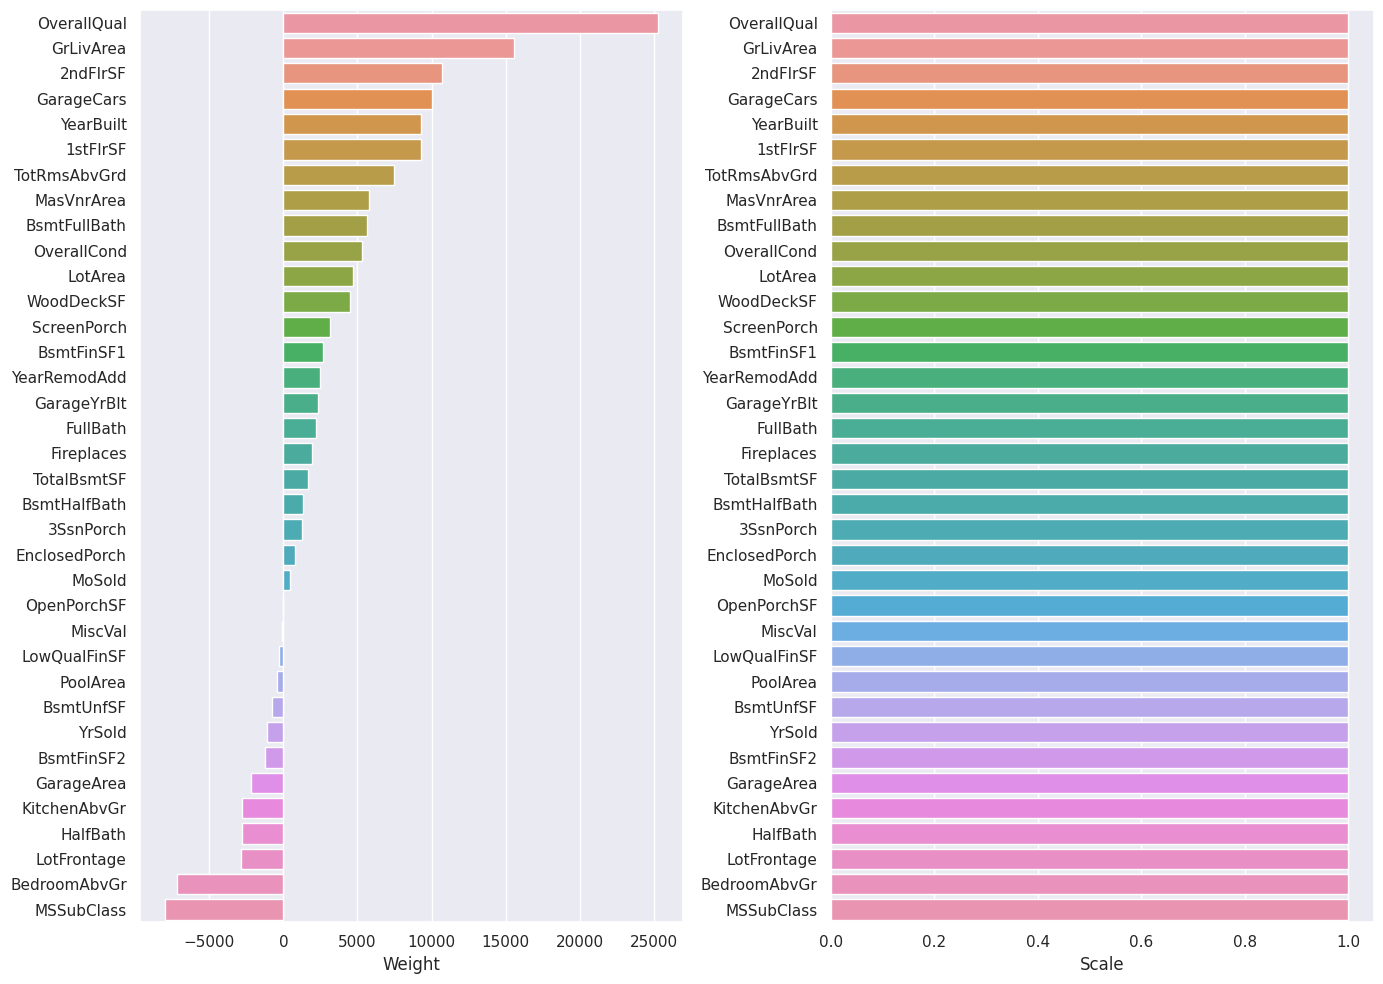

In [16]:
scales = pd.Series(data=X_train_scaled.std(axis=0), index=numeric_features)
show_weights(numeric_features, model_.coef_, scales)

💀💀💀💀💀💀💀💀💀💀💀💀💀💀💀💀💀💀💀💀💀💀💀💀💀💀💀💀

Best alpha 297.6351


Text(0, 0.5, 'cv scores')

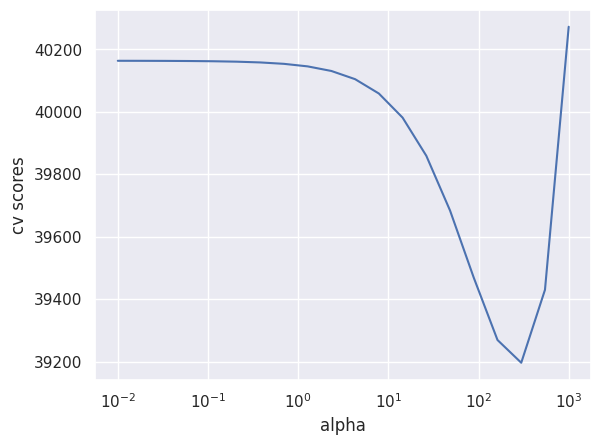

In [17]:
from sklearn.model_selection import GridSearchCV

alphas = np.logspace(-2, 3, 20)
searcher = GridSearchCV(Ridge(), [{'alpha': alphas}], scoring='neg_root_mean_squared_error', cv=10)
searcher.fit(X_train_scaled, y_train)

best_alpha = searcher.best_params_['alpha']
print('Best alpha %.4f' % best_alpha)

plt.plot(alphas, -searcher.cv_results_['mean_test_score'])
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('cv scores')

using pipeline because it allows storing sequence of steps and correctly handles different types of samples

In [18]:
from sklearn.pipeline import Pipeline

simple_pipeline = Pipeline(
    [
        ('scaling', StandardScaler()),
        ('regression', Ridge(best_alpha))
    ]
)
model = simple_pipeline.fit(X_train[numeric_features], y_train)
y_pred = model.predict(X_test[numeric_features])
print('Test RMSE %.4f' % mean_squared_error(y_test, y_pred, squared=False))


Test RMSE 31703.3590


In [19]:
categorical = list(X_train.dtypes[X_train.dtypes == 'object'].index)
X_train[categorical] = X_train[categorical].fillna('NotGiven')
X_test[categorical] = X_test[categorical].fillna('NotGiven')
X_train[categorical].sample(20)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
184,RL,Pave,NotGiven,IR1,Lvl,AllPub,Inside,Gtl,BrkSide,RRAn,...,Attchd,Unf,TA,TA,Y,NotGiven,MnPrv,NotGiven,WD,Normal
837,RM,Pave,NotGiven,Reg,Lvl,AllPub,Inside,Gtl,BrDale,Norm,...,Detchd,Unf,TA,TA,Y,NotGiven,NotGiven,NotGiven,WD,Normal
1094,RL,Pave,NotGiven,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Fin,TA,TA,Y,NotGiven,NotGiven,NotGiven,WD,Normal
1291,RM,Pave,NotGiven,Reg,Lvl,AllPub,Inside,Gtl,BrDale,Norm,...,Detchd,Unf,TA,TA,Y,NotGiven,NotGiven,NotGiven,WD,Normal
436,RM,Pave,NotGiven,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,...,Detchd,Unf,TA,TA,Y,NotGiven,NotGiven,NotGiven,WD,Normal
626,RL,Pave,NotGiven,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,RFn,TA,TA,Y,NotGiven,GdWo,Shed,WD,Normal
1315,RL,Pave,NotGiven,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NotGiven,NotGiven,NotGiven,WD,Normal
697,RL,Pave,NotGiven,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,...,Detchd,Unf,TA,TA,Y,NotGiven,NotGiven,NotGiven,WD,Normal
1451,RL,Pave,NotGiven,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,...,Attchd,Fin,TA,TA,Y,NotGiven,NotGiven,NotGiven,New,Partial
10,RL,Pave,NotGiven,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,...,Detchd,Unf,TA,TA,Y,NotGiven,NotGiven,NotGiven,WD,Normal


In [20]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

column_transformer = ColumnTransformer(
    [
        ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
        ('scaling', StandardScaler(), numeric_features)
    ]
)

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Test RMSE %.4f' % mean_squared_error(y_test, y_pred, squared=False))

Test RMSE 26094.7378


In [21]:
print('size before one-hot-encoding', X_train.shape)
print('size after one-hot-encoding', column_transformer.transform(X_train).shape)

size before one-hot-encoding (1022, 79)
size after one-hot-encoding (1022, 294)


In [22]:
from sklearn.linear_model import Lasso

column_transformer = ColumnTransformer(
    [
        ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
        ('scaling', StandardScaler(), numeric_features)
    ]
)

lasso_pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso())
])

model = lasso_pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Test RMSE %.4f' % mean_squared_error(y_test, y_pred, squared=False))

Test RMSE 26468.4015


In [23]:
nul_weights_ridge = np.sum(pipeline.steps[-1][-1].coef_ == 0)
nul_weights_lasso = np.sum(lasso_pipeline.steps[-1][-1].coef_ == 0)
print("Zero weights in Ridge:", nul_weights_ridge)
print("Zero weights in Lasso:", nul_weights_lasso)

Zero weights in Ridge: 0
Zero weights in Lasso: 29


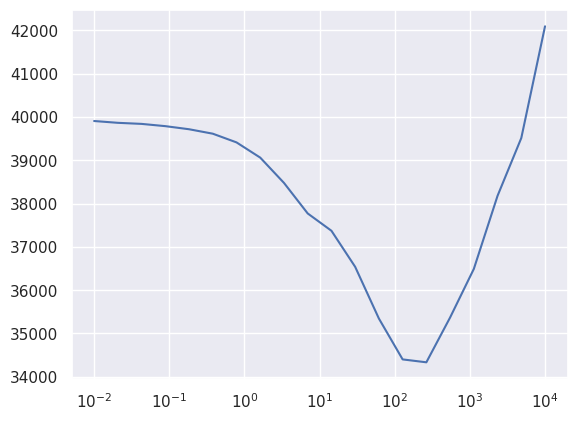

In [24]:
alphas = np.logspace(-2, 4, 20)

searcher = GridSearchCV(lasso_pipeline, [{'regression__alpha': alphas}], scoring='neg_root_mean_squared_error', cv = 10, n_jobs=-1)

searcher.fit(X_train, y_train)

best_alpha = searcher.best_params_['regression__alpha']

plt.plot(alphas, -searcher.cv_results_["mean_test_score"])
plt.xscale("log")

In [25]:
column_transformer = ColumnTransformer(
    [
        ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
        ('scaling', StandardScaler(), numeric_features)
    ]
)

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso(best_alpha))
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Test RMSE %.4f' % mean_squared_error(y_test, y_pred, squared=False))

Test RMSE 25642.6115


<Axes: xlabel='SalePrice', ylabel='Density'>

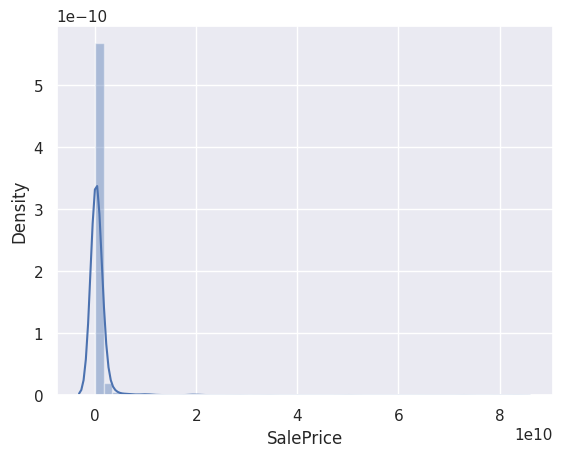

In [26]:
error = (y_train - model.predict(X_train)) ** 2
sns.distplot(error)

In [27]:
mask = (error < np.quantile(error, 0.95))

In [28]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso(best_alpha))
])

model = pipeline.fit(X_train[mask], y_train[mask])
y_pred = model.predict(X_test)
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))

Test RMSE = 24963.5922


<Axes: xlabel='SalePrice', ylabel='Density'>

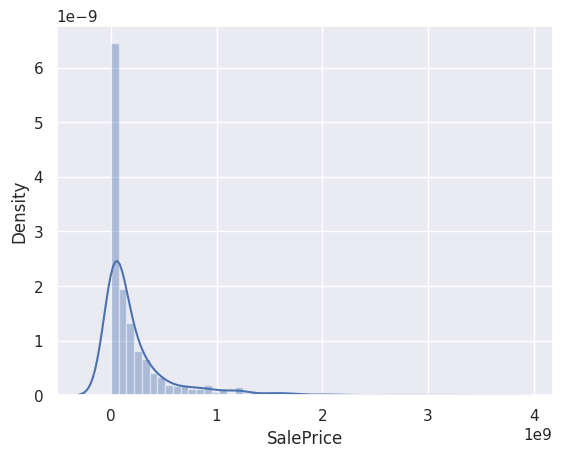

In [29]:
X_train = X_train[mask]
y_train = y_train[mask]

error = (y_train[mask] - model.predict(X_train[mask])) ** 2
sns.distplot(error)

In [30]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Test RMSE %.4f' % mean_squared_error(y_test, y_pred, squared=False))

Test RMSE 23477.2672


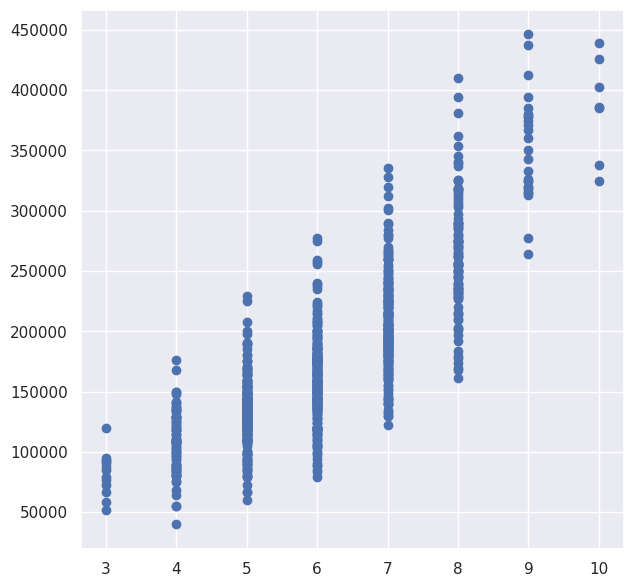

In [31]:
plt.figure(figsize=(7, 7))
plt.scatter(X_train.OverallQual, y_train)


In [32]:
threeshold = 5
mask = (X_train.OverallQual <= threeshold)
X_train_1 = X_train[mask]
y_train_1 = y_train[mask]
X_train_2 = X_train[~mask]
y_train_2 = y_train[~mask]

In [33]:
column_transformer1 = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

column_transformer2 = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline1 = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer1),
    ('regression', Ridge())
])

pipeline2 = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer2),
    ('regression', Ridge())
])

model1 = pipeline1.fit(X_train_1, y_train_1)
model2 = pipeline2.fit(X_train_2, y_train_2)

y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)

mask_test = (X_test.OverallQual <= threeshold)

y_pred = y_pred1.copy()
y_pred[~mask_test] = y_pred2[~mask_test]

print('Test RMSE %.4f' % mean_squared_error(y_test, y_pred, squared=False))

Test RMSE 22665.9534


(-2.0, 2.0)

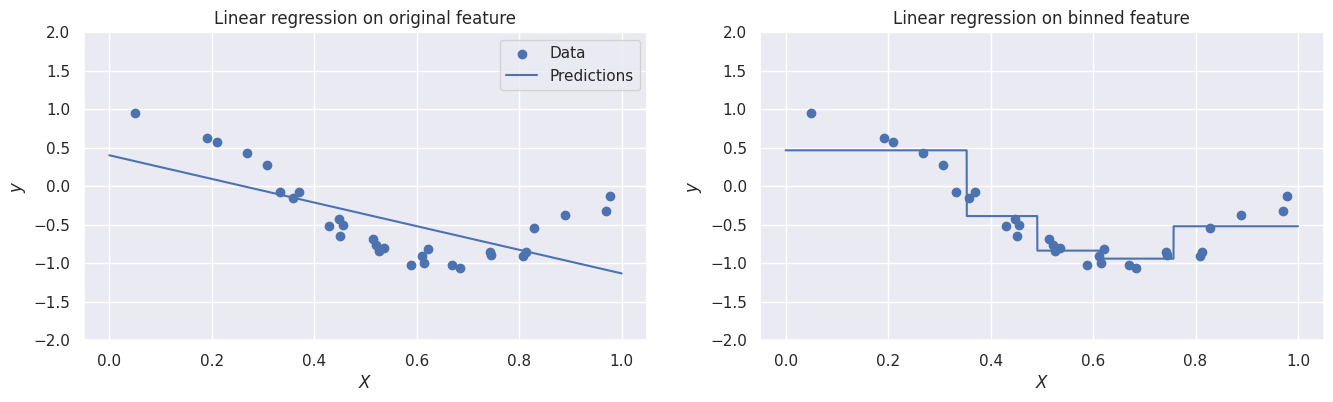

In [34]:
from sklearn.preprocessing import KBinsDiscretizer
x_plot = np.linspace(0, 1, 10000)

X = np.random.uniform(0, 1, size=30)
y = np.cos(1.5 * np.pi * X) + np.random.normal(scale=0.1, size=X.shape)

fig, axs = plt.subplots(figsize=(16, 4), ncols=2)

regr = LinearRegression()
regr.fit(X[:, np.newaxis], y)
y_pred_regr = regr.predict(x_plot[:, np.newaxis])
axs[0].scatter(X[:, np.newaxis], y, label="Data")
axs[0].plot(x_plot, y_pred_regr, label="Predictions")
axs[0].legend()
axs[0].set_title("Linear regression on original feature")
axs[0].set_xlabel("$X$")
axs[0].set_ylabel("$y$")
axs[0].set_ylim(-2, 2)

binner = KBinsDiscretizer(n_bins=5, strategy='quantile')
pipeline = Pipeline(steps=[
    ('binning', binner),
    ('regression', LinearRegression())
])
pipeline.fit(X[:, np.newaxis], y)
y_pred_binned = pipeline.predict(x_plot[:, np.newaxis])
axs[1].scatter(X[:, np.newaxis], y, label="Data")
axs[1].plot(x_plot, y_pred_binned, label="Predictions")
axs[1].set_title("Linear regression on binned feature")
axs[1].set_xlabel("$X$")
axs[1].set_ylabel("$y$")
axs[1].set_ylim(-2, 2)

Text(0, 0.5, '$y$')

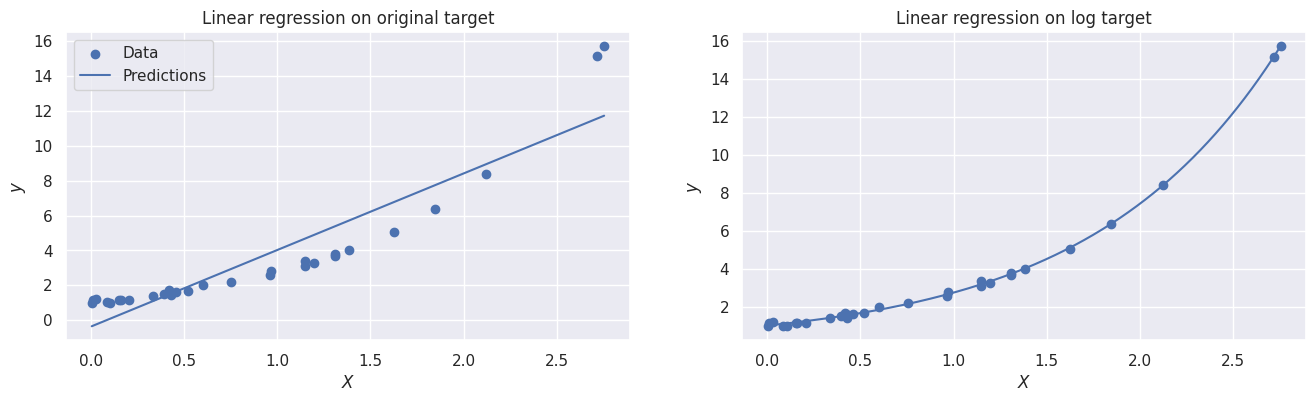

In [35]:
X = np.random.exponential(1, size=30)
y = np.exp(X) + np.random.normal(scale=0.1, size=X.shape)

x_plot = np.linspace(np.min(X), np.max(X), 10000)

fig, axs = plt.subplots(figsize=(16, 4), ncols=2)

regr = LinearRegression()
regr.fit(X[:, np.newaxis], y)
y_pred_regr = regr.predict(x_plot[:, np.newaxis])
axs[0].scatter(X[:, np.newaxis], y, label="Data")
axs[0].plot(x_plot, y_pred_regr, label="Predictions")
axs[0].legend()
axs[0].set_title("Linear regression on original target")
axs[0].set_xlabel("$X$")
axs[0].set_ylabel("$y$")

y_log = np.log(y)
regr.fit(X[:, np.newaxis], y_log)
y_pred_log = np.exp(regr.predict(x_plot[:, np.newaxis]))
axs[1].scatter(X[:, np.newaxis], y, label="Data")
axs[1].plot(x_plot, y_pred_log, label="Predictions")
axs[1].set_title("Linear regression on log target")
axs[1].set_xlabel("$X$")
axs[1].set_ylabel("$y$")